In [1]:
import numpy as np
import tensorflow as tf

Predict planet mass 

In [2]:
disknames = ["AS_209", "Elias_24", "GW_Lup" , "Sz_114"]

In [3]:
# prediction
# 0                 1             2        3      4
#10Me(0.03 MJ)   30 Me (0.1 MJ)  0.3 MJ  1 MJ    3 MJ
Mps = ["10 Me", "30 Me", "0.3 Mj", "1 Mj", "3 Mj"]

In [4]:
print ("VGG predictions")
model = tf.keras.models.load_model("../models/VGG_like/model")
for diskname in disknames:
    img64 = np.load(f"../data/{diskname}.npy")
    predict_scores = model.predict(img64[None,:,:,None])
    idxmax = np.argmax(predict_scores)
    Mp  = Mps[idxmax]
    print (f"{diskname} Mp index: {idxmax}, Mp/Mstar: {Mp}")

VGG predictions
AS_209 Mp index: 1, Mp/Mstar: 30 Me
Elias_24 Mp index: 1, Mp/Mstar: 30 Me
GW_Lup Mp index: 0, Mp/Mstar: 10 Me
Sz_114 Mp index: 0, Mp/Mstar: 10 Me


In [5]:
print ("ResNet predictions")
model = tf.keras.models.load_model("../models/resnet/model")
for diskname in disknames:
    img64 = np.load(f"../data/{diskname}.npy")
    predict_scores = model.predict(img64[None,:,:,None])
    idxmax = np.argmax(predict_scores)
    Mp  = Mps[idxmax]
    print (f"{diskname} Mp index: {idxmax}, Mp/Mstar: {Mp}")

ResNet predictions
AS_209 Mp index: 2, Mp/Mstar: 0.3 Mj
Elias_24 Mp index: 1, Mp/Mstar: 30 Me
GW_Lup Mp index: 0, Mp/Mstar: 10 Me
Sz_114 Mp index: 0, Mp/Mstar: 10 Me


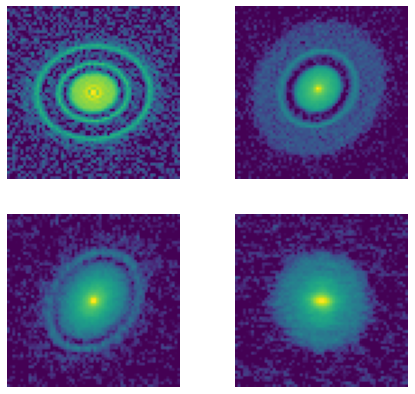

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
# These data are 64x64 and downgraded to this resolution beforehand
plt.figure(figsize=(7.5, 7))
for i, diskname in enumerate(disknames):
    img64 = np.load(f"../data/{diskname}.npy")
    plt.subplot(2,2,i+1)
    plt.imshow(img64)
    plt.axis("off")